<h1 style="color:blue;"><b>Project Title:</b></h1><p style="font-size:25px"> <b>Hypothesis on Covid-19 Vaccination and Death rate</p></b> <h1 style="color:blue;">Objective</h1><p style="font-size:25px">To analyze whether countries with higher COVID-19 vaccination rates have lower COVID-19 death rates.</p>


<h1 style="color:blue">Hypothesis</h1>
<p style="font-size:25px"><b>Null Hypothesis</b><br>Vaccination rate and death rate are not correlated.<br>
<b>Alternate Hypothesis</b><br>Vaccination rate and death rate are correlated.

In [46]:
#importing all libraries and data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("C:/Users/Sakee/Downloads/data cleaning/p_covid_data.csv")
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [47]:
df.shape

(535365, 61)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535365 entries, 0 to 535364
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     535365 non-null  object 
 1   date                                        535365 non-null  object 
 2   total_cases                                 521655 non-null  float64
 3   new_cases                                   518289 non-null  float64
 4   new_cases_smoothed                          517084 non-null  float64
 5   total_cases_per_million                     521655 non-null  float64
 6   new_cases_per_million                       518289 non-null  float64
 7   new_cases_smoothed_per_million              517084 non-null  float64
 8   total_deaths                                521655 non-null  float64
 9   new_deaths                                  519181 non-null  float64
 

In [49]:
#filtering the columns we want
df=df[['country','date','total_cases','total_deaths','population','total_vaccinations']]
df

,country,date,total_cases,total_deaths,population,total_vaccinations
0,Afghanistan,2020-01-01,NaN,NaN,40578847.0,NaN
1,Afghanistan,2020-01-02,NaN,NaN,40578847.0,NaN
2,Afghanistan,2020-01-03,NaN,NaN,40578847.0,NaN
3,Afghanistan,2020-01-04,0.0,0.0,40578847.0,NaN
4,Afghanistan,2020-01-05,0.0,0.0,40578847.0,NaN
...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436.0,5740.0,16069061.0,NaN
535361,Zimbabwe,2025-09-25,266436.0,5740.0,16069061.0,NaN
535362,Zimbabwe,2025-09-26,266436.0,5740.0,16069061.0,NaN
535363,Zimbabwe,2025-09-27,266436.0,5740.0,16069061.0,NaN


In [50]:
#remove the duplicates
df[df.duplicated()]

,country,date,total_cases,total_deaths,population,total_vaccinations


In [51]:
#shape of the data after duplicates are removed.
df.shape

(535365, 6)

In [52]:
#checking for nulls
df.isnull().sum()

country                    0
date                       0
total_cases            13710
total_deaths           13710
population             17203
total_vaccinations    452143
dtype: int64

In [53]:
#checking the percentage of nulls in each column out of whole data set
print("percentage of nulls in total_cases:",(13710/len(df))*100)
print("percentage of nulls in total_deaths:",(13710/len(df))*100)
print("percentage of nulls in population:",(17203/len(df))*100)
print("percentage of nulls in total_vaccinations:",(452143/len(df))*100)

percentage of nulls in total_cases: 2.5608696870359475
percentage of nulls in total_deaths: 2.5608696870359475
percentage of nulls in population: 3.2133217524492634
percentage of nulls in total_vaccinations: 84.4550913862505


In [54]:
#since there is only 2 and 3 percentage of nulls over the 100% of dataset,
#we will drop all those nulls.
#and there is 84% of nulls in total_vaccinations column we will fill those nulls.

df=df.dropna(subset=['total_cases','total_deaths','population'])

In [55]:
#we dropped the rows that have the nulls
df.isnull().sum()

country                    0
date                       0
total_cases                0
total_deaths               0
population                 0
total_vaccinations    430197
dtype: int64

In [56]:
df

,country,date,total_cases,total_deaths,population,total_vaccinations
3,Afghanistan,2020-01-04,0.0,0.0,40578847.0,NaN
4,Afghanistan,2020-01-05,0.0,0.0,40578847.0,NaN
5,Afghanistan,2020-01-06,0.0,0.0,40578847.0,NaN
6,Afghanistan,2020-01-07,0.0,0.0,40578847.0,NaN
7,Afghanistan,2020-01-08,0.0,0.0,40578847.0,NaN
...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436.0,5740.0,16069061.0,NaN
535361,Zimbabwe,2025-09-25,266436.0,5740.0,16069061.0,NaN
535362,Zimbabwe,2025-09-26,266436.0,5740.0,16069061.0,NaN
535363,Zimbabwe,2025-09-27,266436.0,5740.0,16069061.0,NaN


<h1 style="color:blue";>Observations</h1><p style="font-size:25px;">we have 84% of total_vaccinations column data as nulls.<br>because we didn't had vaccinations at the starting dates of corona.<br>so first we will check the stating date of vaccinations.<br>Then we will fill before dates with zero and after dates with forward fill.<br>
The reason for forward fill is vaccinations would never decrease <br> as disease increase. so we go with ffill.</p>

In [57]:
df.dtypes

country                object
date                   object
total_cases           float64
total_deaths          float64
population            float64
total_vaccinations    float64
dtype: object

In [58]:
#convert date dtype to date
#dtype of other columns will be changed later.because int won't support nulls.
df['date']=pd.to_datetime(df['date'])
df.dtypes

country                       object
date                  datetime64[ns]
total_cases                  float64
total_deaths                 float64
population                   float64
total_vaccinations           float64
dtype: object

In [59]:
#check start date
start_dates=(df[df['total_vaccinations']>0].
             sort_values(['country','date']).groupby('country').first().
             reset_index()[['country','date','total_vaccinations']])
start_dates

,country,date,total_vaccinations
0,Afghanistan,2021-02-28,8200.0
1,Africa,2020-12-02,826675.0
2,Albania,2021-01-12,128.0
3,Algeria,2021-01-30,30.0
4,Andorra,2021-01-25,576.0
...,...,...,...
220,Wallis and Futuna,2021-03-23,1286.0
221,World,2020-12-02,11496278.0
222,Yemen,2021-05-09,18555.0
223,Zambia,2021-04-15,106.0


In [60]:
df=df.sort_values(['country','date'])
df

,country,date,total_cases,total_deaths,population,total_vaccinations
3,Afghanistan,2020-01-04,0.0,0.0,40578847.0,NaN
4,Afghanistan,2020-01-05,0.0,0.0,40578847.0,NaN
5,Afghanistan,2020-01-06,0.0,0.0,40578847.0,NaN
6,Afghanistan,2020-01-07,0.0,0.0,40578847.0,NaN
7,Afghanistan,2020-01-08,0.0,0.0,40578847.0,NaN
...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436.0,5740.0,16069061.0,NaN
535361,Zimbabwe,2025-09-25,266436.0,5740.0,16069061.0,NaN
535362,Zimbabwe,2025-09-26,266436.0,5740.0,16069061.0,NaN
535363,Zimbabwe,2025-09-27,266436.0,5740.0,16069061.0,NaN


In [61]:
#forward filling from vaccination start dates
df['total_vaccinations']=df.groupby('country')['total_vaccinations'].ffill()

In [62]:
#filling nulls with zero before the vaccine start date.
df['total_vaccinations']=df['total_vaccinations'].fillna(0)

In [63]:
#Now we don't have any nulls.
df.isnull().sum()

country               0
date                  0
total_cases           0
total_deaths          0
population            0
total_vaccinations    0
dtype: int64

In [64]:
df.dtypes

country                       object
date                  datetime64[ns]
total_cases                  float64
total_deaths                 float64
population                   float64
total_vaccinations           float64
dtype: object

In [65]:
# we will change dtype for these columns to int. because for these columns
# decimal values would be invalid.
cols=['total_cases','total_deaths','population','total_vaccinations']
df[cols]=df[cols].astype(int)
df.dtypes

country                       object
date                  datetime64[ns]
total_cases                    int32
total_deaths                   int32
population                     int32
total_vaccinations             int32
dtype: object

<h1 style="color:blue">EDA</h1>

In [66]:
df.describe()

,date,total_cases,total_deaths,population,total_vaccinations
count,511180,5.111800e+05,5.111800e+05,5.111800e+05,5.111800e+05
mean,2022-11-16 00:00:00,8.655409e+06,8.992928e+04,2.139389e+07,-1.414361e+06
min,2020-01-04 00:00:00,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09
25%,2021-06-10 00:00:00,9.109000e+03,6.900000e+01,3.726415e+05,0.000000e+00
50%,2022-11-16 00:00:00,8.020300e+04,1.000000e+03,5.521248e+06,8.332100e+05
75%,2024-04-23 00:00:00,1.011016e+06,1.111400e+04,2.623295e+07,1.357694e+07
max,2025-09-28 00:00:00,7.786526e+08,7.101788e+06,1.446884e+09,2.145937e+09
std,NaN,5.033269e+07,4.773149e+05,3.441913e+08,3.405297e+08


<h1 style='color:blue'>Observations</h1>
<p style="font-size:25px"> In the above table we have negative values in <br> population and total_vaccinations columns. so let's remove them.</p>

In [67]:
df=df[(df['population']>=0) & (df['total_vaccinations']>=0)]

In [68]:
df.describe()

,date,total_cases,total_deaths,population,total_vaccinations
count,498825,4.988250e+05,4.988250e+05,4.988250e+05,4.988250e+05
mean,2022-11-13 00:04:16.173207296,3.695929e+06,4.321771e+04,4.668471e+07,4.051721e+07
min,2020-01-04 00:00:00,0.000000e+00,0.000000e+00,5.130000e+02,0.000000e+00
25%,2021-06-06 00:00:00,8.680000e+03,6.500000e+01,3.975420e+05,0.000000e+00
50%,2022-11-11 00:00:00,7.306600e+04,8.970000e+02,5.649888e+06,8.984940e+05
75%,2024-04-20 00:00:00,8.414690e+05,9.698000e+03,2.620099e+07,1.385711e+07
max,2025-09-28 00:00:00,2.546923e+08,2.322106e+06,1.446884e+09,2.145937e+09
std,NaN,1.856824e+07,1.957266e+05,1.617052e+08,1.525265e+08


In [69]:
#defining vaccination and death Rates.
df['vaccination_rate']=(df['total_vaccinations']/df['population'])*100
df['death_rate']=(df['total_deaths']/df['total_cases'])*100
df

,country,date,total_cases,total_deaths,population,total_vaccinations,vaccination_rate,death_rate
3,Afghanistan,2020-01-04,0,0,40578847,0,0.000000,NaN
4,Afghanistan,2020-01-05,0,0,40578847,0,0.000000,NaN
5,Afghanistan,2020-01-06,0,0,40578847,0,0.000000,NaN
6,Afghanistan,2020-01-07,0,0,40578847,0,0.000000,NaN
7,Afghanistan,2020-01-08,0,0,40578847,0,0.000000,NaN
...,...,...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436,5740,16069061,13935112,86.720139,2.154364
535361,Zimbabwe,2025-09-25,266436,5740,16069061,13935112,86.720139,2.154364
535362,Zimbabwe,2025-09-26,266436,5740,16069061,13935112,86.720139,2.154364
535363,Zimbabwe,2025-09-27,266436,5740,16069061,13935112,86.720139,2.154364


In [70]:
#performing basic stats again.
df.describe()

,date,total_cases,total_deaths,population,total_vaccinations,vaccination_rate,death_rate
count,498825,4.988250e+05,4.988250e+05,4.988250e+05,4.988250e+05,498825.000000,4.700810e+05
mean,2022-11-13 00:04:16.173207296,3.695929e+06,4.321771e+04,4.668471e+07,4.051721e+07,93.782772,inf
min,2020-01-04 00:00:00,0.000000e+00,0.000000e+00,5.130000e+02,0.000000e+00,0.000000,0.000000e+00
25%,2021-06-06 00:00:00,8.680000e+03,6.500000e+01,3.975420e+05,0.000000e+00,0.000000,4.792624e-01
50%,2022-11-11 00:00:00,7.306600e+04,8.970000e+02,5.649888e+06,8.984940e+05,72.759920,1.119518e+00
75%,2024-04-20 00:00:00,8.414690e+05,9.698000e+03,2.620099e+07,1.385711e+07,167.398668,2.052982e+00
max,2025-09-28 00:00:00,2.546923e+08,2.322106e+06,1.446884e+09,2.145937e+09,415.881449,inf
std,NaN,1.856824e+07,1.957266e+05,1.617052e+08,1.525265e+08,91.667242,NaN


In [72]:
#converting infinity values to nulls
df.replace([float('inf'),-float('inf')],pd.NA,inplace=True)
df

,country,date,total_cases,total_deaths,population,total_vaccinations,vaccination_rate,death_rate
3,Afghanistan,2020-01-04,0,0,40578847,0,0.000000,NaN
4,Afghanistan,2020-01-05,0,0,40578847,0,0.000000,NaN
5,Afghanistan,2020-01-06,0,0,40578847,0,0.000000,NaN
6,Afghanistan,2020-01-07,0,0,40578847,0,0.000000,NaN
7,Afghanistan,2020-01-08,0,0,40578847,0,0.000000,NaN
...,...,...,...,...,...,...,...,...
535360,Zimbabwe,2025-09-24,266436,5740,16069061,13935112,86.720139,2.154364
535361,Zimbabwe,2025-09-25,266436,5740,16069061,13935112,86.720139,2.154364
535362,Zimbabwe,2025-09-26,266436,5740,16069061,13935112,86.720139,2.154364
535363,Zimbabwe,2025-09-27,266436,5740,16069061,13935112,86.720139,2.154364


In [73]:
df.isnull().sum()

country                   0
date                      0
total_cases               0
total_deaths              0
population                0
total_vaccinations        0
vaccination_rate          0
death_rate            28766
dtype: int64

In [74]:
(28766/len(df))*100

5.766751866887184

In [75]:
df=df.dropna(subset=['death_rate'])
df.isnull().sum()

country               0
date                  0
total_cases           0
total_deaths          0
population            0
total_vaccinations    0
vaccination_rate      0
death_rate            0
dtype: int64

<h1 style="color:blue"> Observations</h1>
<p style="font-size:25px">we get infinity values and nulls in death rate column when we did the calculations.<br> So we converted the infinity values into nulls and deleted the nulls.<br>

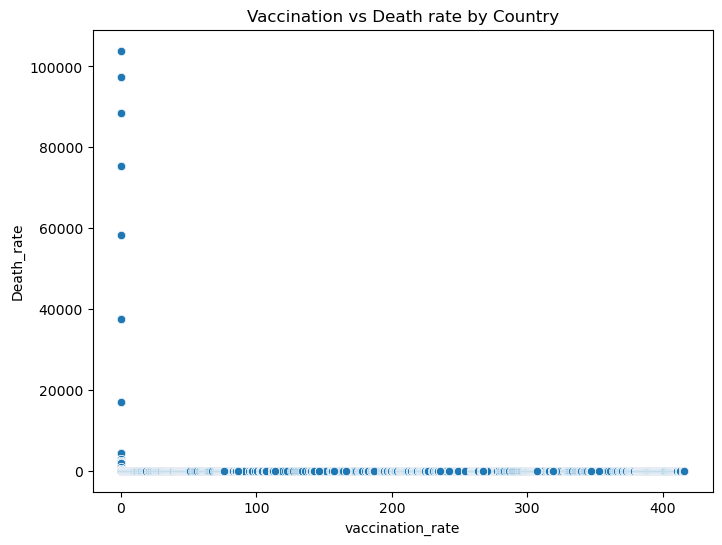

In [77]:
#make a plot of vaccination and death rate.
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='vaccination_rate',y='death_rate')
plt.xlabel('vaccination_rate')
plt.ylabel('Death_rate')
plt.title('Vaccination vs Death rate by Country')
plt.show()

<h1 style="color:blue">Observations</h1>
<p style="font-size:25px">In above scatter plot, it is negative correlation.
<br>As vaccination rate increasing the death rate is decreasing.<br>It means No.of deaths have been decreased when the vaccinations have been increased.

<h1 style="color:blue">Hypothesis</h1>
<p style="font-size:25px">Let's make a <b>null hypothesis Ho</b>=vaccinations and deaths have no correlation.<br><b>alternative hupothesis H1</b>
=vaccinations and deaths have correlation.

In [80]:
# Use pearsonr correlation.
from scipy.stats import pearsonr
corr,p_value=pearsonr(df['vaccination_rate'],df['death_rate'])
print(f"Correlation: {corr:.4f}")
print(f"P_Value: {p_value:.4f}")
if (p_value<0.05) & (corr<0):
    print("reject Ho")
else:
    print("fail")

Correlation: -0.0114
P_Value: 0.0000
reject Ho


<h1 style="color:blue">Interpretation</h1>
<p style="font-size:25px"><b>**Result:**</b><br>
Pearson correlation coefficient:-0.0114<br>
P_value:0.0000<br>
Since p_value<0.05 and correlation is negative  we can<b>**reject the Null hypothesis**.</b><br>
This supports the hypothesis that <b>**higher vaccination rates are associated with lower COVID-19 death rates**.</b>

<h1 style="color:blue">Conclusion</h1>
<p style="font-size:25px">The analysis shows a statistically significant negative correlation between vaccination rate and death rate. Countries with higher vaccination coverage generally experienced lower COVID-19 deaths.